In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

In [2]:
#load in average readmissions data and read
average_readmission_clean_csv = Path("Output/Average_Readmission_Clean.csv")
average_readmission_clean = pd.read_csv(average_readmission_clean_csv)
average_readmission_clean

,state,Race,% Readmission
0,ALABAMA,American Indian/Alaska native,15.767442
1,ALABAMA,Asian/Pacific islander,15.480000
2,ALABAMA,Black,15.403689
3,ALABAMA,Hispanic,15.300654
4,ALABAMA,Other,15.555556
...,...,...,...
303,WYOMING,Asian/Pacific islander,15.181818
304,WYOMING,Black,15.000000
305,WYOMING,Hispanic,14.988764
306,WYOMING,Other,15.062500


In [3]:
#convert to dataframe
average_readmission_clean_df = pd.DataFrame(average_readmission_clean)
#find average readmission rate per state --- so we can find top 5 states and bottom 5 states (%readmisson)
avg_readmissions_by_state = average_readmission_clean_df.groupby('state')['% Readmission'].mean()
avg_read_state_df = pd.DataFrame(avg_readmissions_by_state)
avg_read_state_df.head(10)

,% Readmission
state,
ALABAMA,15.478021
ALASKA,14.172724
ARIZONA,15.015916
ARKANSAS,15.829309
CALIFORNIA,15.387323
COLORADO,14.612978
CONNECTICUT,16.042437
DELAWARE,15.629630
DISTRICT OF COLUMBIA,16.743056


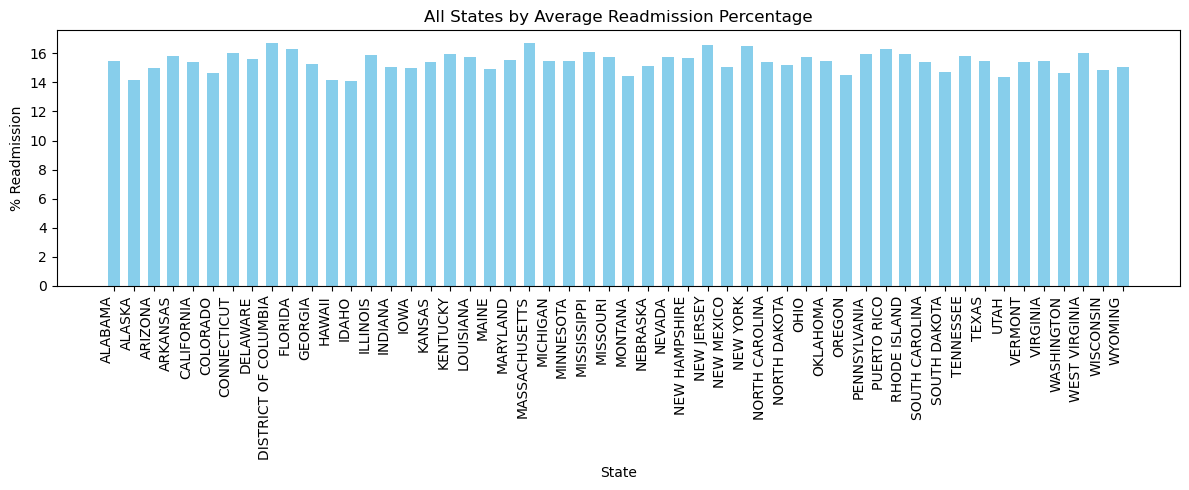

In [4]:
plt.figure(figsize=(12, 5))
plt.bar(avg_read_state_df.index, avg_read_state_df['% Readmission'], color='skyblue', width=0.6)
plt.xlabel('State')
plt.ylabel('% Readmission')
plt.title('All States by Average Readmission Percentage')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [6]:
#Get top 5 states by %Readmission
top_sorted_states = avg_readmissions_by_state.sort_values(ascending=False)
# Get the top 5 states
top_4_states = top_sorted_states.head(4)
top_4_states_df = pd.DataFrame(top_4_states)
top_4_states_df

,% Readmission
state,
DISTRICT OF COLUMBIA,16.743056
MASSACHUSETTS,16.706773
NEW JERSEY,16.568565
NEW YORK,16.498212


In [7]:
#Get bottom 5 states by %Readmission
bottom_sorted_states = avg_readmissions_by_state.sort_values(ascending=True)
# Get the bottom 5 states
bottom_4_states = bottom_sorted_states.head(4)
bottom_4_states_df = pd.DataFrame(bottom_4_states)
bottom_4_states_df

,% Readmission
state,
IDAHO,14.127872
HAWAII,14.171429
ALASKA,14.172724
UTAH,14.367306


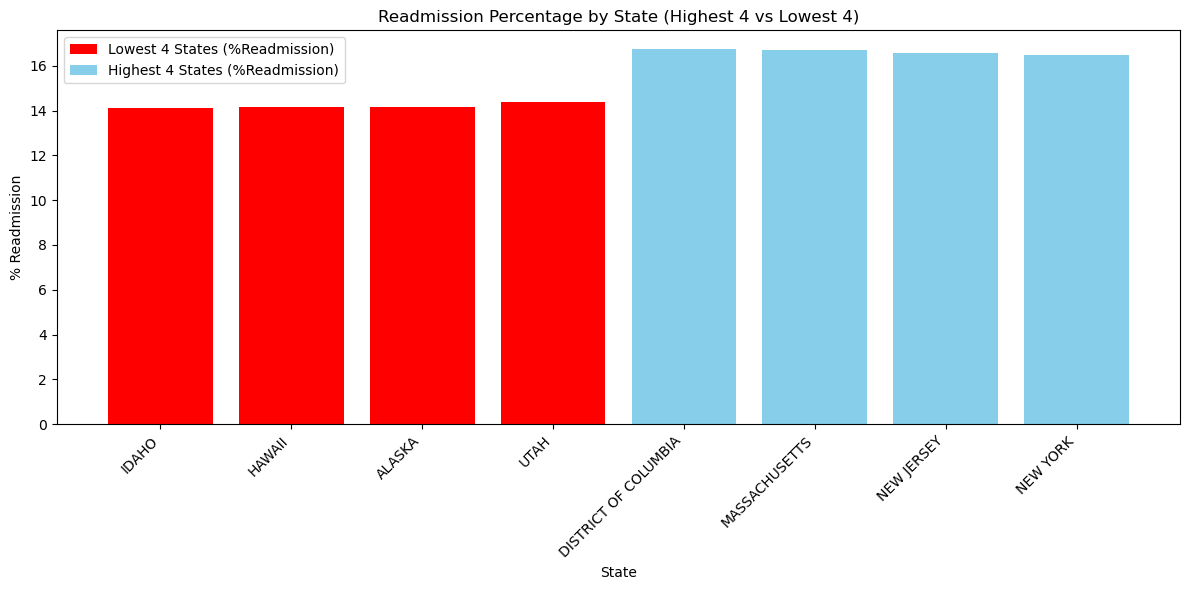

In [8]:
plt.figure(figsize=(12, 6))

# Plot bottom_5 data with green bars
plt.bar(bottom_4_states_df.index, bottom_4_states_df['% Readmission'], color='red', width=0.8, label='Lowest 4 States (%Readmission)')

# Plot top_5 data with blue bars
plt.bar(top_4_states_df.index, top_4_states_df['% Readmission'], color='skyblue', width=0.8, label='Highest 4 States (%Readmission)')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by State (Highest 4 vs Lowest 4)')
plt.xticks(rotation=45, ha='right')
plt.legend()  # Show legend with labels for each set of bars
plt.tight_layout()
plt.show()

In [9]:
bottom_4_states = ['IDAHO', 'HAWAII', 'ALASKA', 'UTAH']

filtered_df1 = average_readmission_clean_df[average_readmission_clean_df['state'].str.upper().isin(bottom_4_states)]
filtered_df1

,state,Race,% Readmission
6,ALASKA,American Indian/Alaska native,15.000000
7,ALASKA,Asian/Pacific islander,14.173913
8,ALASKA,Black,14.000000
9,ALASKA,Hispanic,13.925926
10,ALASKA,Other,13.333333
11,ALASKA,White,14.603175
66,HAWAII,American Indian/Alaska native,13.600000
67,HAWAII,Asian/Pacific islander,14.277778
68,HAWAII,Black,14.095238
69,HAWAII,Hispanic,14.333333


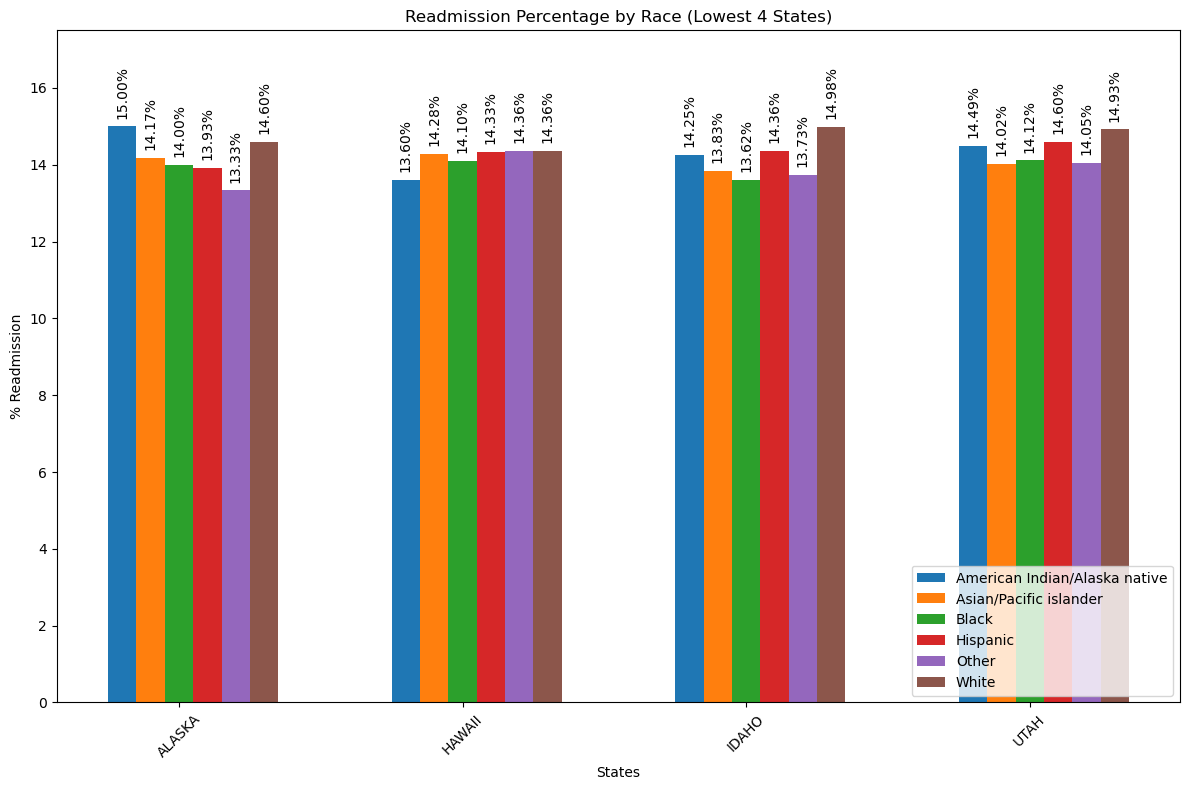

In [10]:
states = filtered_df1['state'].unique()
races = filtered_df1['Race'].unique()

# Group the dataframe by state and race
grouped_df = filtered_df1.groupby(['state', 'Race']).mean().reset_index()

# Create the chart
plt.figure(figsize=(12, 8))
bar_width = 0.1
index = range(len(states))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each race for each state
for i, race in enumerate(races):
    race_data = grouped_df[grouped_df['Race'] == race]
    plt.bar([p + i * bar_width for p in index], race_data['% Readmission'], bar_width, label=race, color=colors[i])
    # Add labels on top each bar
    for j, percentage in enumerate(race_data['% Readmission']):
        plt.text(index[j] + i * bar_width, percentage + 0.2, f'{percentage:.2f}%', ha='center', va='bottom', rotation=90)

plt.xlabel('States')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by Race (Lowest 4 States)')
plt.xticks([p + bar_width * len(states) / 2 for p in index], states)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.ylim(0, 17.5)
plt.tight_layout()
plt.show()

In [11]:
top_4_states = ['DISTRICT OF COLUMBIA', 'MASSACHUSETTS', 'NEW JERSEY', 'NEW YORK']

filtered_df2 = average_readmission_clean_df[average_readmission_clean_df['state'].str.upper().isin(top_4_states)]
filtered_df2

,state,Race,% Readmission
48,DISTRICT OF COLUMBIA,American Indian/Alaska native,17.125000
49,DISTRICT OF COLUMBIA,Asian/Pacific islander,16.777778
50,DISTRICT OF COLUMBIA,Black,16.777778
51,DISTRICT OF COLUMBIA,Hispanic,16.777778
52,DISTRICT OF COLUMBIA,Other,16.555556
53,DISTRICT OF COLUMBIA,White,16.444444
126,MASSACHUSETTS,American Indian/Alaska native,16.860000
127,MASSACHUSETTS,Asian/Pacific islander,16.765306
128,MASSACHUSETTS,Black,16.628319
129,MASSACHUSETTS,Hispanic,16.697248


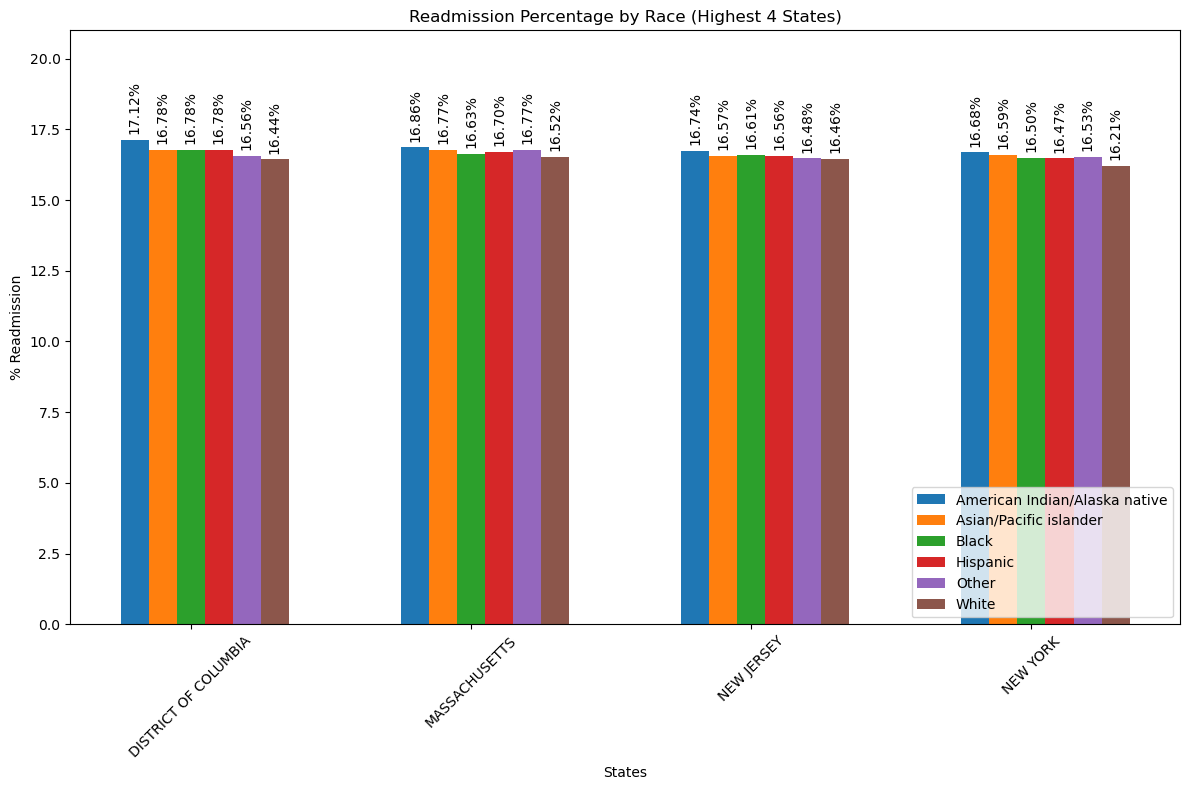

In [12]:
states = filtered_df2['state'].unique()
races = filtered_df2['Race'].unique()

# Group the dataframe by state and race
grouped_df = filtered_df2.groupby(['state', 'Race']).mean().reset_index()

# Create bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.1
index = range(len(states))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each race for each state
for i, race in enumerate(races):
    race_data = grouped_df[grouped_df['Race'] == race]
    plt.bar([p + i * bar_width for p in index], race_data['% Readmission'], bar_width, label=race, color=colors[i])
    # Add labels on top each bar
    for j, percentage in enumerate(race_data['% Readmission']):
        plt.text(index[j] + i * bar_width, percentage + 0.2, f'{percentage:.2f}%', ha='center', va='bottom', rotation=90)

plt.xlabel('States')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by Race (Highest 4 States)')
plt.xticks([p + bar_width * len(states) / 2 for p in index], states)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.ylim(0, 21)
plt.tight_layout()
plt.show()

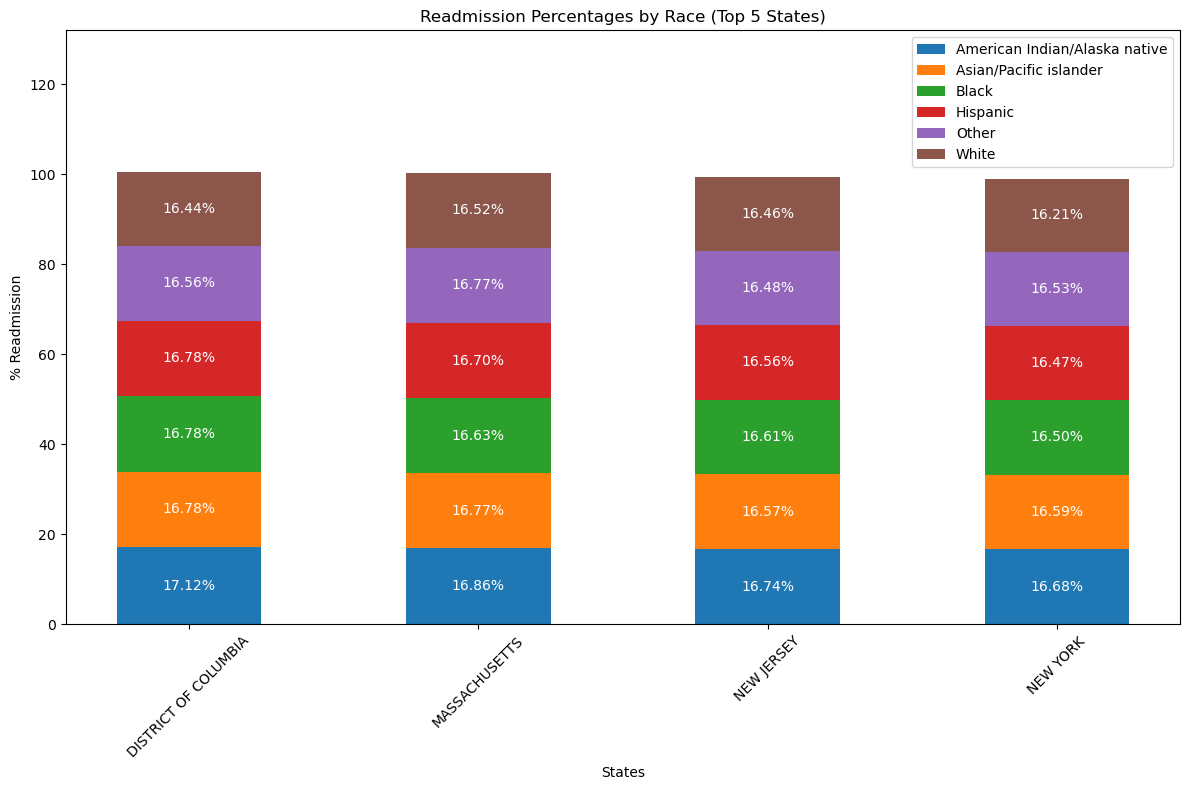

In [13]:
states = filtered_df2['state'].unique()
races = filtered_df2['Race'].unique()

# Group dataframe by state and race
grouped_df = filtered_df2.groupby(['state', 'Race']).mean().reset_index()

#create chart
plt.figure(figsize=(12, 8))

bar_width = 0.5
index = range(len(states))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
bottom = [0] * len(states)

# Plot each race for each state
for i, race in enumerate(races):
    race_data = grouped_df[grouped_df['Race'] == race]
    race_percentages = race_data['% Readmission']
    plt.bar(index, race_percentages, bar_width, label=race, color=colors[i], bottom=bottom)
    # Add labels within bars
    for j, percentage in enumerate(race_percentages):
        plt.text(index[j], bottom[j] + percentage / 2, f'{percentage:.2f}%', ha='center', va='center', color='white')
    bottom = [bottom[j] + percentage for j, percentage in enumerate(race_percentages)]

plt.xlabel('States')
plt.ylabel('% Readmission')
plt.title('Readmission Percentages by Race (Top 5 States)')
plt.xticks(index, states)
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.ylim(0, 132) 
plt.tight_layout()
plt.show()